#  Working With Datetime Format in Python - Time Series Data

In [133]:
# Import necessary packages

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import earthpy as et


In [2]:
# Download the data
data = pd.read_csv('D:\DATA\covid19 senegal\COVID-19-master\data\confirmes.csv')


In [3]:
data.head()

date   tests  cas  contact  importe  communautaire  total  gueri  \
0  2020-10-22   899.0   24       12        7              5  15508  14026   
1  2020-10-21  1010.0   25        7        5             13  15484  13975   
2  2020-10-20   816.0   27        0       18              9  15459  13922   
3  2020-10-19   829.0   14        3        7              4  15432  13865   
4  2020-10-18  1156.0   26        7        3             16  15418  13814   

   mort  evacue  grave  
0   321       1      5  
1   321       1      5  
2   320       1      6  
3   319       1      5  
4   317       1      6

## Exploring and Analyzing our data automatically with pandas_profiling library

In [4]:
import pandas_profiling

In [5]:
pandas_profiling.ProfileReport(data)

Far from pandas_profiling, we can analyze our data manually, let's start:

In [6]:
# copy our data
exer_data = data.copy()

In [7]:
# Indexing our data with 'data' column
exer_data = exer_data.set_index('date')

In [8]:
exer_data.head()

tests  cas  contact  importe  communautaire  total  gueri  mort  \
date                                                                           
2020-10-22   899.0   24       12        7              5  15508  14026   321   
2020-10-21  1010.0   25        7        5             13  15484  13975   321   
2020-10-20   816.0   27        0       18              9  15459  13922   320   
2020-10-19   829.0   14        3        7              4  15432  13865   319   
2020-10-18  1156.0   26        7        3             16  15418  13814   317   

            evacue  grave  
date                       
2020-10-22       1      5  
2020-10-21       1      5  
2020-10-20       1      6  
2020-10-19       1      5  
2020-10-18       1      6

In [9]:
exer_data.index

Index(['2020-10-22', '2020-10-21', '2020-10-20', '2020-10-19', '2020-10-18',
       '2020-10-17', '2020-10-16', '2020-10-15', '2020-10-14', '2020-10-13',
       ...
       '2020-03-11', '2020-03-10', '2020-03-09', '2020-03-08', '2020-03-07',
       '2020-03-06', '2020-03-05', '2020-03-04', '2020-03-03', '2020-03-02'],
      dtype='object', name='date', length=235)

In [10]:
exer_data.columns

Index(['tests', 'cas', 'contact', 'importe', 'communautaire', 'total', 'gueri',
       'mort', 'evacue', 'grave'],
      dtype='object')

The column values of our data seems to be in French Language, it's possible to translate it with googletrans library

In [11]:
# Let's try to translate something
from google_trans_new import google_translator  
translator = google_translator()  
translate_text = translator.translate('La situation du coronavirus au Senegal',lang_tgt='en')  
print(translate_text)

The situation of the coronavirus in Senegal 


In [25]:
translated_columns = []
for i in exer_data.columns:
   result =  translator.translate(i)
   translated_columns.append(result) 

In [26]:
translated_columns

['tests ',
 'case ',
 'contact ',
 'imported ',
 'community ',
 'total ',
 'Ingredient collar ',
 'dead ',
 'evacue ',
 'grave ']

All is fine, only the 'ingredient collar' is incorrect, the mistake is from the data itself, 'gueri' must have accent in the e, then google translation will recognize it. Gueri means recovered

In [39]:
translated_columns = [i.replace('Ingredient collar', 'recovered') for i in translated_columns]

In [40]:
# rename the dataframe column with translated_column
exer_data.columns = [i for i in translated_columns]

In [41]:
exer_data.columns

Index(['tests ', 'case ', 'contact ', 'imported ', 'community ', 'total ',
       'recovered ', 'dead ', 'evacue ', 'grave '],
      dtype='object')

We changed the column names , let's explore our data little bit

In [42]:
exer_data.head()

tests   case   contact   imported   community   total   \
date                                                                 
2020-10-22   899.0     24        12          7           5   15508   
2020-10-21  1010.0     25         7          5          13   15484   
2020-10-20   816.0     27         0         18           9   15459   
2020-10-19   829.0     14         3          7           4   15432   
2020-10-18  1156.0     26         7          3          16   15418   

            recovered   dead   evacue   grave   
date                                            
2020-10-22       14026    321        1       5  
2020-10-21       13975    321        1       5  
2020-10-20       13922    320        1       6  
2020-10-19       13865    319        1       5  
2020-10-18       13814    317        1       6

<AxesSubplot:xlabel='date'>

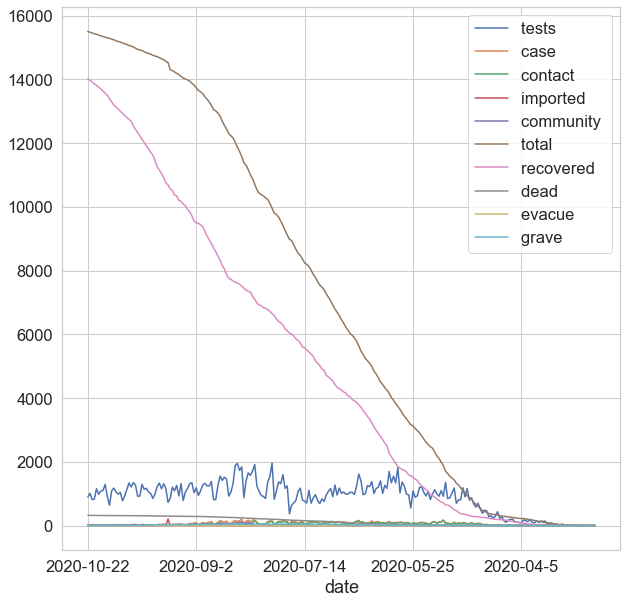

In [49]:
exer_data.plot( use_index=True, figsize=(10,10))

We can see a daily increase of corona virus cases in Senegal within those specific date

In [50]:
exer_data.dtypes

tests         float64
case            int64
contact         int64
imported        int64
community       int64
total           int64
recovered       int64
dead            int64
evacue          int64
grave           int64
dtype: object

In [55]:
exer_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 235 entries, 2020-10-22 to 2020-03-02
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tests       234 non-null    float64
 1   case        235 non-null    int64  
 2   contact     235 non-null    int64  
 3   imported    235 non-null    int64  
 4   community   235 non-null    int64  
 5   total       235 non-null    int64  
 6   recovered   235 non-null    int64  
 7   dead        235 non-null    int64  
 8   evacue      235 non-null    int64  
 9   grave       235 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 20.2+ KB


In [56]:
# reset index of date
exer_data = exer_data.reset_index('date')

In [57]:
exer_data.head()

date  tests   case   contact   imported   community   total   \
0  2020-10-22   899.0     24        12          7           5   15508   
1  2020-10-21  1010.0     25         7          5          13   15484   
2  2020-10-20   816.0     27         0         18           9   15459   
3  2020-10-19   829.0     14         3          7           4   15432   
4  2020-10-18  1156.0     26         7          3          16   15418   

   recovered   dead   evacue   grave   
0       14026    321        1       5  
1       13975    321        1       5  
2       13922    320        1       6  
3       13865    319        1       5  
4       13814    317        1       6

In [60]:
type(exer_data.date)

pandas.core.series.Series

In [108]:
exer_data.columns = exer_data.columns.str.strip()

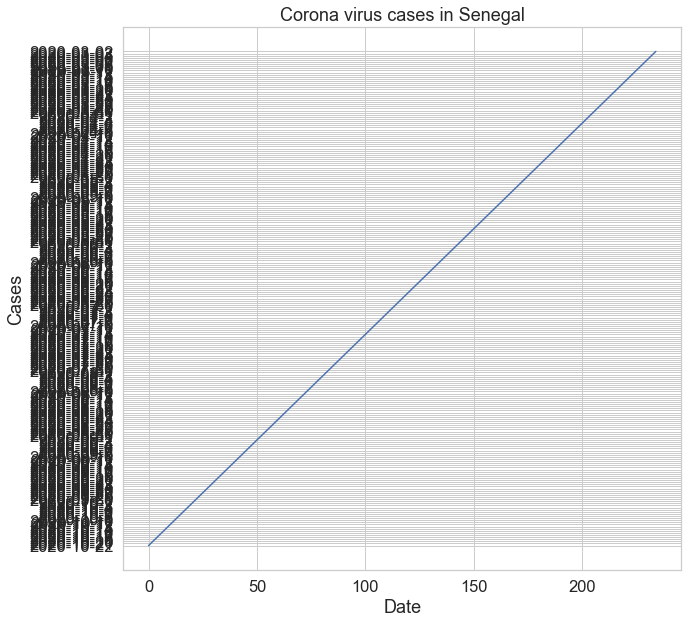

In [109]:
import matplotlib.pyplot as plt
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.plot(exer_data['date'])

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Cases",
       title="Corona virus cases in Senegal")

plt.show()

In [81]:
exer_data.columns.str.replace(' ', '')

Index(['date', 'tests', 'case', 'contact', 'imported', 'community', 'total',
       'recovered', 'dead', 'evacue', 'grave'],
      dtype='object')

<AxesSubplot:xlabel='date'>

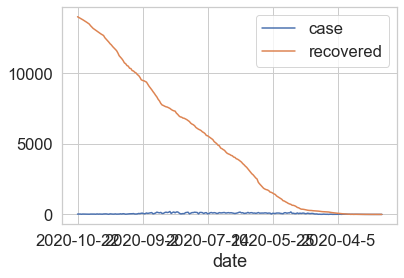

In [110]:
exer_data.plot(x="date", y=["case", "recovered"])


The figure above can show us how the recovered people from corona are decreasing based on the total of daily cases.

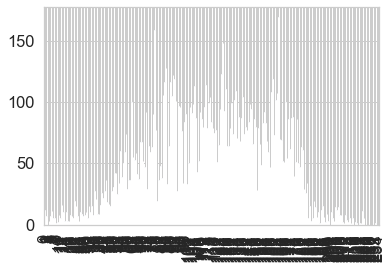

In [113]:
ax = exer_data['contact'].plot(kind="bar")
plt.show(ax)

<AxesSubplot:xlabel='case', ylabel='dead'>

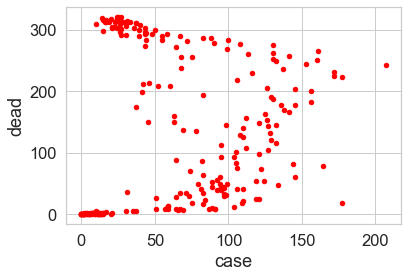

In [116]:
# a scatter plot comparing number of cases and number of death
exer_data.plot(kind='scatter',x='case',y='dead',color='red')


<AxesSubplot:xlabel='case', ylabel='recovered'>

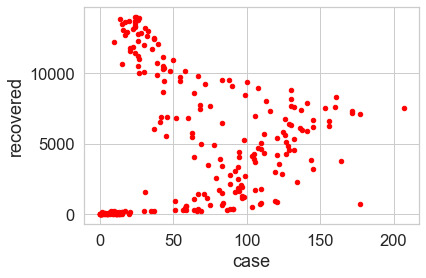

In [117]:
# a scatter plot comparing number of cases and number of recovered
exer_data.plot(kind='scatter',x='case',y='recovered',color='red')


<AxesSubplot:xlabel='date', ylabel='case'>

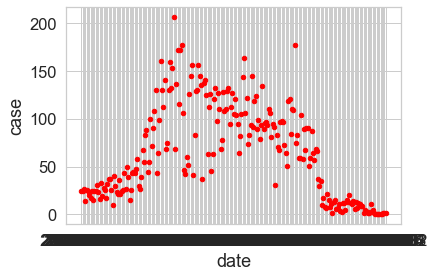

In [118]:
# a scatter plot comparing daily and number of case
exer_data.plot(kind='scatter',x='date',y='case',color='red')


<AxesSubplot:xlabel='case'>

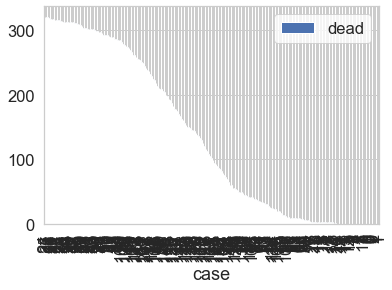

In [120]:
exer_data.plot(kind='bar',x='case',y='dead')


The number of death is lower than the number of cases, that's normal

<AxesSubplot:xlabel='date'>

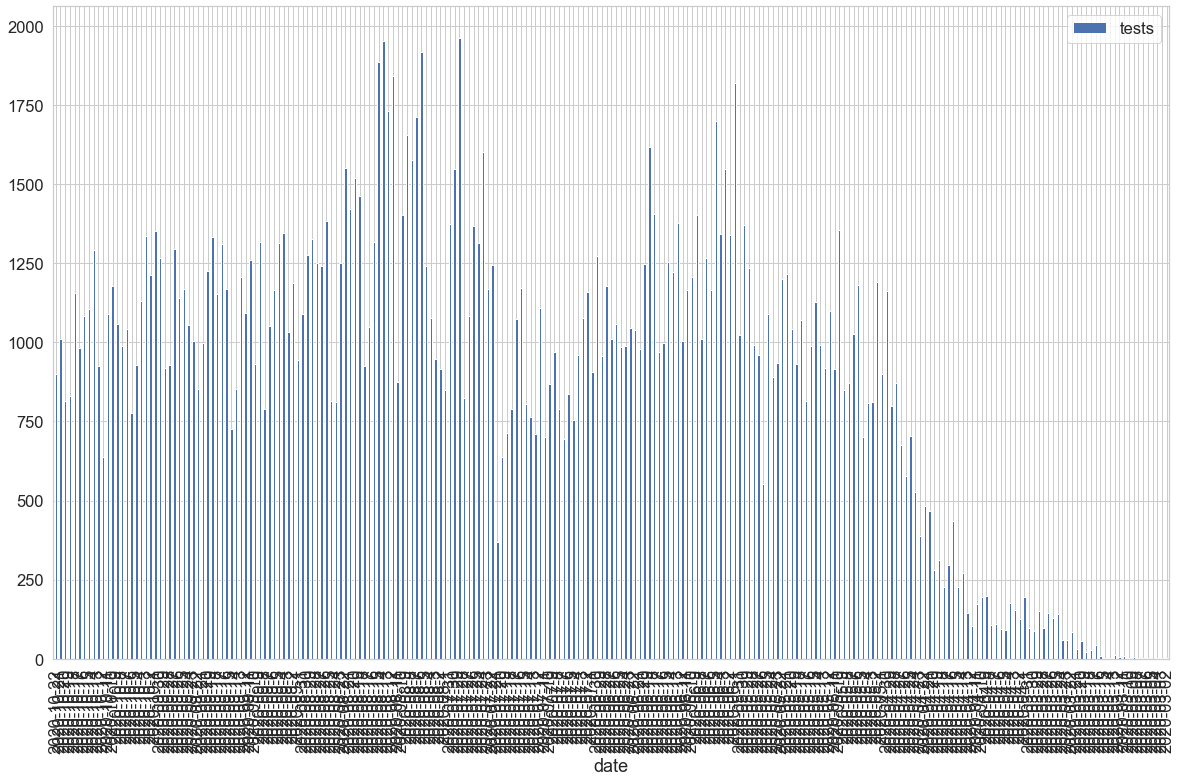

In [125]:
exer_data.plot(x="date", y="tests", kind='bar', figsize=(20,12))


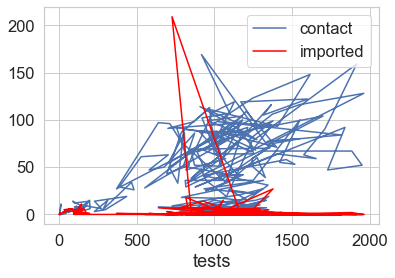

In [127]:
ax = plt.gca()

exer_data.plot(kind='line',x='tests',y='contact',ax=ax)
exer_data.plot(kind='line',x='tests',y='imported', color='red', ax=ax)

plt.show()

In [128]:
exer_data.columns

Index(['date', 'tests', 'case', 'contact', 'imported', 'community', 'total',
       'recovered', 'dead', 'evacue', 'grave'],
      dtype='object')

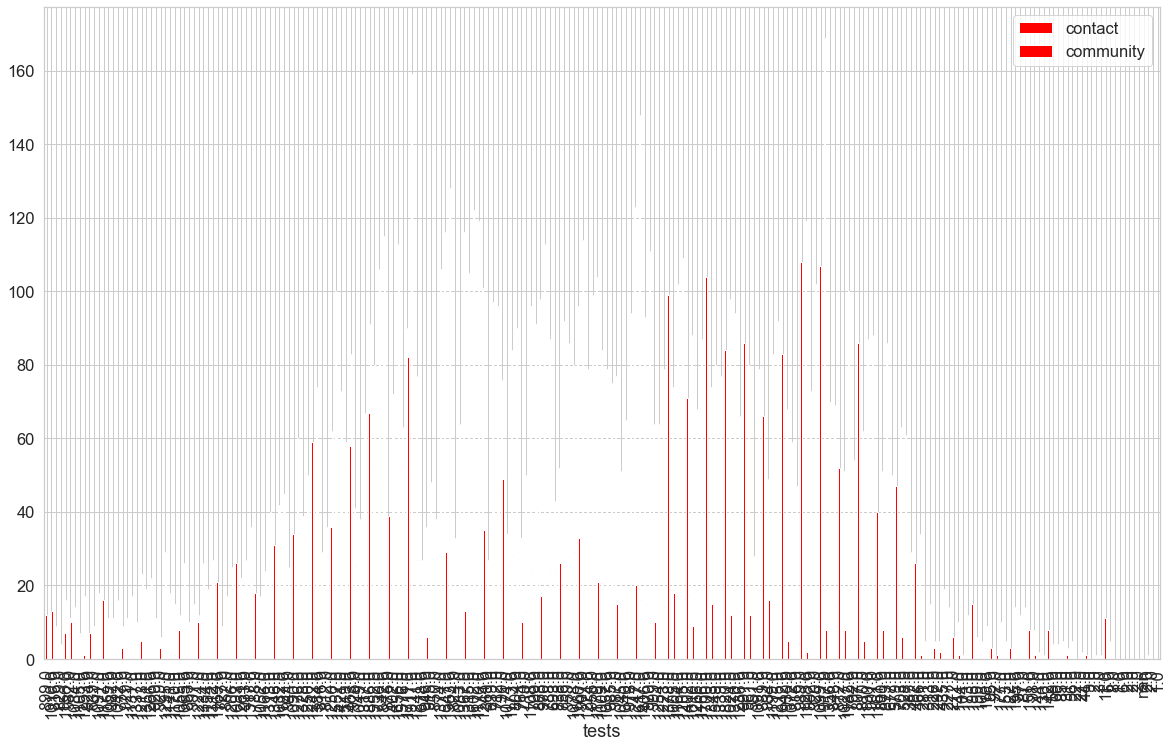

In [131]:
exer_data.plot(kind='bar',x='tests',y=['contact', 'community'], figsize=(20,12), color='red')

# the plot gets saved to 'output.png'
plt.savefig('output.png')